## Road image file

In [2]:
import os
import cv2
import matplotlib.pyplot as plt 

In [3]:
IMAGE_FORMAT = ["jpeg", "jpg", "png"]

def list_image_files(data_dir, sub_dir):
    image_files = []
    images_dir = os.path.join(data_dir, sub_dir)
    for file_path in os.listdir(images_dir):
        if file_path.split(".")[-1] in IMAGE_FORMAT:
            image_files.append(os.path.join(sub_dir, file_path))
    return image_files

In [4]:
def get_RGB_image(data_dir, file_name):
    image_file = os.path.join(data_dir, file_name)
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
train_data_dir = './Covid19-dataset/train/'
train_normals_list = list_image_files(train_data_dir, "Normal")
train_covids_list = list_image_files(train_data_dir, "Covid")
train_pneumonias_list = list_image_files(train_data_dir, "Viral Pneumonia")
train_normals_list

['Normal/06.jpeg',
 'Normal/060.jpeg',
 'Normal/076.jpeg',
 'Normal/021.jpeg',
 'Normal/056.jpeg',
 'Normal/017.jpeg',
 'Normal/083.jpeg',
 'Normal/095.jpeg',
 'Normal/094.jpeg',
 'Normal/082.jpeg',
 'Normal/016.jpeg',
 'Normal/057.jpeg',
 'Normal/020.jpeg',
 'Normal/077.jpeg',
 'Normal/061.jpeg',
 'Normal/07.jpeg',
 'Normal/050.jpeg',
 'Normal/011.jpeg',
 'Normal/085.jpeg',
 'Normal/093.jpeg',
 'Normal/066.jpeg',
 'Normal/070.jpeg',
 'Normal/071.jpeg',
 'Normal/067.jpeg',
 'Normal/088.jpeg',
 'Normal/01.jpeg',
 'Normal/092.jpeg',
 'Normal/084.jpeg',
 'Normal/010.jpeg',
 'Normal/051.jpeg',
 'Normal/091.jpeg',
 'Normal/087.jpeg',
 'Normal/068.jpeg',
 'Normal/013.jpeg',
 'Normal/052.jpeg',
 'Normal/025.jpeg',
 'Normal/072.jpeg',
 'Normal/064.jpeg',
 'Normal/02.jpeg',
 'Normal/03.jpeg',
 'Normal/065.jpeg',
 'Normal/073.jpeg',
 'Normal/024.jpeg',
 'Normal/053.jpeg',
 'Normal/012.jpeg',
 'Normal/086.jpeg',
 'Normal/069.jpeg',
 'Normal/023.jpeg',
 'Normal/074.jpeg',
 'Normal/062.jpeg',
 'Nor

In [7]:
import matplotlib.pyplot as plt
from ipywidgets import interact

In [8]:
min_num_files = min(len(train_normals_list), len(train_covids_list), len(train_pneumonias_list))
print(min_num_files)

70


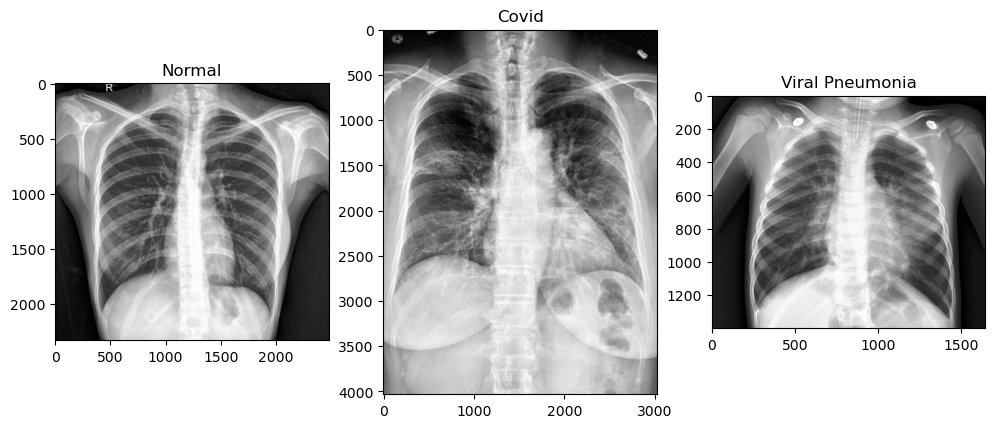

interactive(children=(IntSlider(value=0, description='index', max=69), Output()), _dom_classes=('widget-intera…

In [9]:
@interact(index=(0, min_num_files-1))
def show_samples(index=0):
    normal_image = get_RGB_image(train_data_dir, train_normals_list[index])
    covid_image = get_RGB_image(train_data_dir, train_covids_list[index])
    pneumonia_image = get_RGB_image(train_data_dir, train_pneumonias_list[index])
    
    plt.figure(figsize=(12, 8))
    plt.subplot(131)
    plt.title(f'Normal')
    plt.imshow(normal_image)
    
    plt.subplot(132)
    plt.title(f'Covid')
    plt.imshow(covid_image)
               
    plt.subplot(133)
    plt.title(f'Viral Pneumonia')
    plt.imshow(pneumonia_image)

In [10]:
# Road image file path
train_data_dir = "./Covid19-dataset/train"
class_list = ["Normal", "Covid", "Viral Pneumonia"]

In [11]:
# function of set file
class Chest_dataset():
    def __init__(self, data_dir, transformer=None):
        self.data_dir = data_dir
        normal = list_image_files(data_dir, "Normal")
        covid = list_image_files(data_dir, "Covid")
        pneumonia = list_image_files(data_dir, "Viral Pneumonia")
        
        self.files_path = normal + covid + pneumonia
        self.transformer = transformer
        
    def __len__(self):
        return len(self.files_path)
    
    def __getitem__(self, index):
        image_file = os.path.join(self.data_dir, self.files_path[index])
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        class_name = self.files_path[index].split(os.sep)[0]
        class_id = class_list.index(class_name)
        
        if self.transformer:
            image = self.transformer(image)
            class_id = torch.Tensor([class_id]).long()
            
        return image, class_id

In [12]:
dset = Chest_dataset(data_dir=train_data_dir)

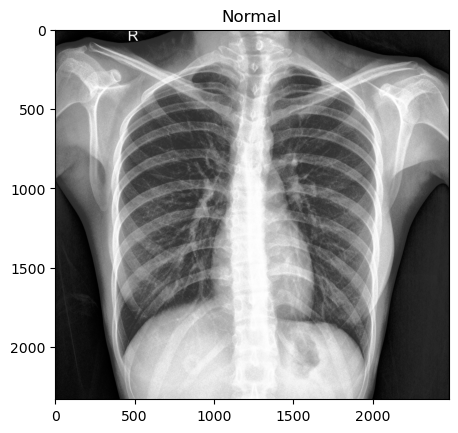

In [13]:
index = 0
image, target = dset[index]

plt.title(class_list[target])
plt.imshow(image)

In [14]:
len(dset)

251

### Convert to tensor type

In [15]:
import torch
from torchvision import transforms

In [16]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [17]:
train_dset = Chest_dataset(train_data_dir, transformer)
index = 200
image = train_dset[index][0]
target = train_dset[index][1]
print(image.shape)
print(target)

torch.Size([3, 224, 224])
tensor([2])


### Data Loader

In [18]:
from torch.utils.data import DataLoader

In [19]:
train_data_dir = "./Covid19-dataset/train/"
val_data_dir = "./Covid19-dataset/test/"

train_dset = Chest_dataset(train_data_dir, transformer)
train_dloader = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)
val_dset = Chest_dataset(val_data_dir, transformer)
val_dloader = DataLoader(val_dset, batch_size=1,drop_last=False)

In [20]:
# dataloader function
def build_dataloader(train_data_dir, val_data_dir):
    dataloaders = {}
    train_dset = Chest_dataset(train_data_dir, transformer)
    dataloaders["train"] = DataLoader(train_dset, batch_size=4, shuffle=True, drop_last=True)
    val_dset = Chest_dataset(val_data_dir, transformer)
    dataloaders["val"] = DataLoader(val_dset, batch_size=1,drop_last=False)
    return dataloaders

In [21]:
train_data_dir = "./Covid19-dataset/train/"
val_data_dir = "./Covid19-dataset/test/"
dataloaders = build_dataloader(train_data_dir, val_data_dir)

### Load Classification Model - VGG19

In [22]:
from torchvision import models

In [23]:
model = models.vgg19(pretrained=True)

In [24]:
from torchsummary import summary

summary(model, (3, 224, 224), batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 224, 224]           1,792
              ReLU-2          [1, 64, 224, 224]               0
            Conv2d-3          [1, 64, 224, 224]          36,928
              ReLU-4          [1, 64, 224, 224]               0
         MaxPool2d-5          [1, 64, 112, 112]               0
            Conv2d-6         [1, 128, 112, 112]          73,856
              ReLU-7         [1, 128, 112, 112]               0
            Conv2d-8         [1, 128, 112, 112]         147,584
              ReLU-9         [1, 128, 112, 112]               0
        MaxPool2d-10           [1, 128, 56, 56]               0
           Conv2d-11           [1, 256, 56, 56]         295,168
             ReLU-12           [1, 256, 56, 56]               0
           Conv2d-13           [1, 256, 56, 56]         590,080
             ReLU-14           [1, 256,

### Transform Model's head section to fit of data

In [25]:
import torch.nn as nn

In [26]:
model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
model.classifier = nn.Sequential( # 각 레이어를 묶고 대치
    nn.Flatten(),
    nn.Linear(512, 256),
    nn.ReLU(),
#     nn.Dropout(0.1),
    nn.Linear(256, 3),
#     nn.Sigmoid()
)

In [27]:
def build_vgg19_based_model(device="cpu"):
    device = torch.device(device)
    model = models.vgg19(pretrained=True)
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
    model.classifier = nn.Sequential( # 각 레이어를 묶고 대치
    nn.Flatten(),
    nn.Linear(512, 256),
    nn.ReLU(),
#     nn.Dropout(0.1),
    nn.Linear(256, 3),
#     nn.Sigmoid()
    nn.Softmax(dim=1)
    )
    return model.to(device)

In [28]:
model = build_vgg19_based_model(device="cpu")

In [29]:
summary(model, (3, 224, 224), batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 224, 224]           1,792
              ReLU-2          [1, 64, 224, 224]               0
            Conv2d-3          [1, 64, 224, 224]          36,928
              ReLU-4          [1, 64, 224, 224]               0
         MaxPool2d-5          [1, 64, 112, 112]               0
            Conv2d-6         [1, 128, 112, 112]          73,856
              ReLU-7         [1, 128, 112, 112]               0
            Conv2d-8         [1, 128, 112, 112]         147,584
              ReLU-9         [1, 128, 112, 112]               0
        MaxPool2d-10           [1, 128, 56, 56]               0
           Conv2d-11           [1, 256, 56, 56]         295,168
             ReLU-12           [1, 256, 56, 56]               0
           Conv2d-13           [1, 256, 56, 56]         590,080
             ReLU-14           [1, 256,

### Cross-Entropy

In [30]:
loss_func = nn.CrossEntropyLoss(reduction="mean")

### Applying SGDM optimization techniques

In [31]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Create Accuracy to Verification model
- Top-1 Accuracy<br>
    가장 confidence가 높은 예측값의 클래스가 ground truth와 일치하는 경우 True-Positive로 판단
- Top-5 Accuracy<br>
    confidence가 높은 상위 5개 예측값의 클래스에 ground truth가 존재하는 경우 True-Positive로 판단

In [32]:
@torch.no_grad()
def get_accuracy(image, target, model):
    batch_size = image.shape[0]
    prediction = model(image) # (B, NUM_CLASSES) - [B, 0]: 0.8, [B, 1]: 0.1, [B, 2]: 0.1
    _, pred_label = torch.max(prediction, dim=1) # (B, 1) -> pred_label:0
    is_correct = (pred_label == target) # True/False
    accuracy = is_correct.cpu().numpy().sum() / batch_size
    return accuracy

### Model training

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data_dir = "./Covid19-dataset/train/"
test_data_dir = "./Covid19-dataset/test/"
dataloaders = build_dataloader(train_data_dir, val_data_dir)
model = build_vgg19_based_model(device='cuda' if torch.cuda.is_available() else 'cpu')
loss_func = nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [34]:
def train_one_epoch(dataloaders, model, optimizer, loss_function, device):
    losses = {}
    accuracies = {}
    
    for phase in ["train", "val"]: # train, val both
        running_loss = 0.0 # To check
        running_correct = 0.0
        
        if phase == "train":
            model.train()
        else:
            model.eval()
            
            
        for index, batch in enumerate(dataloaders[phase]): # load to phase
            image = batch[0].to(device) # return value
            label = batch[1].squeeze(dim=1).to(device)
            
            with torch.set_grad_enabled(phase == 'train'):
                prediction = model(image)
                loss = loss_func(prediction, label)
                
                optimizer.zero_grad()
                
                if phase == 'train':
                    loss.backward()
                    optimizer.step() # optimize with loss
                    
            running_loss += loss.item()
            running_correct += get_accuracy(image, label, model)
            
            if phase == 'train':
                if index % 10 == 0:
                    print(f"{index}/{len(dataloaders['train'])} - Running loss: {loss.item()}")
        losses[phase] = running_loss / len(dataloaders[phase])
        accuracies[phase] = running_correct / len(dataloaders[phase])
    return losses, accuracies

In [193]:
num_epochs = 10

best_acc = 0.0
train_loss, train_acc = [], []
val_loss, val_acc = [], []

for epoch in range(num_epochs): # append train, val of one epoch
    losses, accuracies = train_one_epoch(dataloaders, model, optimizer, loss_func, device)
    train_loss.append(losses['train'])
    train_acc.append(accuracies['train'])
    val_loss.append(losses['val'])
    val_acc.append(accuracies['val'])
    
    print(f"{epoch}/{num_epochs}-Tr loss:{losses['train']}, Val loss: {losses['val']}")
    print(f"{epoch}/{num_epochs}-Tr loss:{accuracies['train']}, Val loss: {accuracies['val']}")
    
    if accuracies['val'] > best_acc:
        best_acc = accuracies['val']
        torch.save(model.state_dict(), f"model_{epoch}.pth")

0/62 - Running loss: 0.6026549935340881
10/62 - Running loss: 0.5973260998725891
20/62 - Running loss: 0.5518506765365601
30/62 - Running loss: 0.8027462959289551
40/62 - Running loss: 0.5514726042747498
50/62 - Running loss: 0.6454580426216125
60/62 - Running loss: 0.793558657169342
0/10-Tr loss:0.6736881781008935, Val loss: 0.8442251727436528
0/10-Tr loss:0.907258064516129, Val loss: 0.696969696969697
0/62 - Running loss: 0.861143171787262
10/62 - Running loss: 0.5531777739524841
20/62 - Running loss: 0.6942395567893982
30/62 - Running loss: 0.5514461994171143
40/62 - Running loss: 0.5587689280509949
50/62 - Running loss: 0.5641010403633118
60/62 - Running loss: 0.5573854446411133
1/10-Tr loss:0.6413536956233363, Val loss: 0.6128544229449648
1/10-Tr loss:0.9354838709677419, Val loss: 0.9848484848484849
0/62 - Running loss: 0.5525264143943787
10/62 - Running loss: 0.5548117756843567
20/62 - Running loss: 0.5641608238220215
30/62 - Running loss: 0.5569965839385986
40/62 - Running loss:

### Performance Verification though Test Image

In [35]:
test_data_dir = './Covid19-dataset/test/'
class_list = ["Normal", "Covid", "Viral Pneumonia"]

test_normals_list = list_image_files(test_data_dir, "Normal")
test_covids_list = list_image_files(test_data_dir, "Covid")
test_pneumonias_list = list_image_files(test_data_dir, "Viral Pneumonia")
test_normals_list

['Normal/0107.jpeg',
 'Normal/0111.jpeg',
 'Normal/0110.jpeg',
 'Normal/0106.jpeg',
 'Normal/0121.jpeg',
 'Normal/0101.jpeg',
 'Normal/0117.jpeg',
 'Normal/0116.jpeg',
 'Normal/0120.jpeg',
 'Normal/0119.jpeg',
 'Normal/0115.jpeg',
 'Normal/0103.jpeg',
 'Normal/0102.jpeg',
 'Normal/0114.jpeg',
 'Normal/0118.jpeg',
 'Normal/0122.jpeg',
 'Normal/0105.jpeg',
 'Normal/0109.jpeg',
 'Normal/0108.jpeg',
 'Normal/0112.jpeg']

In [43]:
def preprocess_image(image): # transform to tensor type
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    tensor_image = transformer(image)
    tensor_image = tensor_image.unsqueeze(dim=0)
    return tensor_image

In [37]:
@torch.no_grad()
def model_predict(image, model):
    tensor_image = preprocess_image(image)
    prediction = model(tensor_image)
    _, pred_label = torch.max(prediction.detach().cpu(), dim=1)
    pred_label = pred_label.squeeze(dim=0) # delete dummy data
    return pred_label.item() # 

In [38]:
ckpt = torch.load('./model_1.pth')

model = build_vgg19_based_model(device='cpu')
model.load_state_dict(ckpt)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

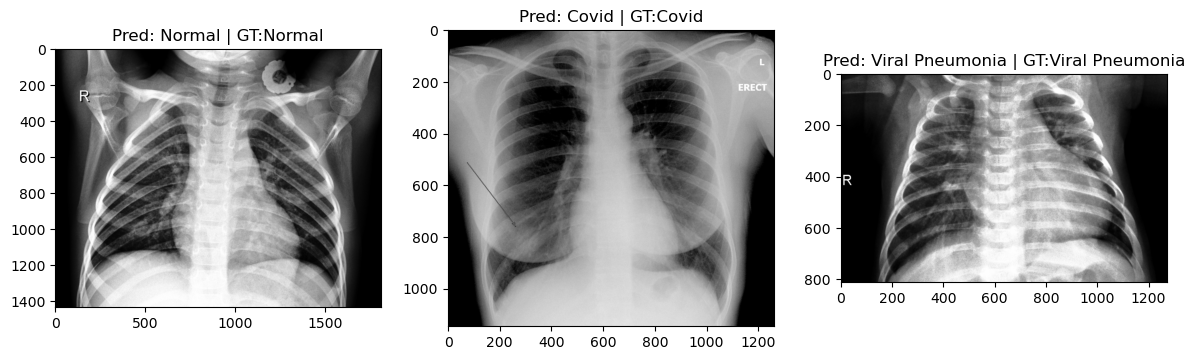

interactive(children=(IntSlider(value=0, description='index', max=19), Output()), _dom_classes=('widget-intera…

In [46]:
min_num_files = min(len(test_normals_list), len(test_covids_list), len(test_pneumonias_list))

@interact(index=(0, min_num_files-1))
def show_result(index=0):
    normal_image = get_RGB_image(test_data_dir, test_normals_list[index])
    covid_image = get_RGB_image(test_data_dir, test_covids_list[index])
    pneumonia_image = get_RGB_image(test_data_dir, test_pneumonias_list[index])
    
    pred_normal = model_predict(normal_image, model)
    pred_covid = model_predict(covid_image, model)
    pred_pneumonia = model_predict(pneumonia_image, model)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(131)
    plt.title(f'Pred: {class_list[pred_normal]} | GT:Normal')
    plt.imshow(normal_image)
    
    plt.subplot(132)
    plt.title(f'Pred: {class_list[pred_covid]} | GT:Covid')
    plt.imshow(covid_image)
               
    plt.subplot(133)
    plt.title(f'Pred: {class_list[pred_pneumonia]} | GT:Viral Pneumonia')
    plt.imshow(pneumonia_image)
    plt.tight_layout()

## Organization
<br>

### 1.  Build image dataset

### 2. Transform to tensor type with Torchvision transforms

### 3. Load VGG19 model and Modify head sections

### 4. Understanding and Applying of Cross entropy Loss function

### 5. Understanding and Applying of SGDM

### 6. Understanding of deeplearing result like the principle of human reasoning
